# Natural Language Processing using NLTK

In [1]:
# Install NLTK - pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /projects/9d5fc2b3-70ee-401
[nltk_data]     f-b938-559ac8a15479/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /projects/9d5fc2b3-70ee-401f-
[nltk_data]     b938-559ac8a15479/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## NLP Part 0 - Get some Data!

In [2]:
import urllib
import bs4 as bs
import re

In [3]:
# We will read the contents of the Wikipedia article "Global_warming" as an example, please feel free to use your own!
# We can open the page using "urllib.request.urlopen" then read it using ".read()"
source = urllib.request.urlopen('https://en.wikipedia.org/wiki/Global_warming').read()

# Beautiful Soup is a Python library for pulling data out of HTML and XML files.
# you may need to install a parser library --> "!pip3 install lxml"
# Parsing the data/creating BeautifulSoup object

soup = bs.BeautifulSoup(source,"html.parser") 

# Fetching the data
text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    text += paragraph.text

# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',text) # [0-9]* --> Matches zero or more repetitions of any digit from 0 to 9
text = text.lower() #everything to lowercase
text = re.sub(r'\W^.?!',' ',text) # \W --> Matches any character which is not a word character except (.?!)
text = re.sub(r'\d',' ',text) # \d --> Matches any decimal digit
text = re.sub(r'\s+',' ',text) # \s --> Matches any characters that are considered whitespace (Ex: [\t\n\r\f\v].)

In [4]:
text[:100]

' climate change includes both global warming driven by human-induced emissions of greenhouse gases a'

## NLP Part 1 - Tokenization of paragraphs/sentences

In [5]:
# Tokenizing sentences
sentences = nltk.sent_tokenize(text) #tokenizing or splitting a string, text into a list of sentences.

In [6]:
print(sentences[:10])

[' climate change includes both global warming driven by human-induced emissions of greenhouse gases and the resulting large-scale shifts in weather patterns.', "though there have been previous periods of climatic change, since the mid- th century humans have had an unprecedented impact on earth's climate system and caused change on a global scale.", 'the largest driver of warming is the emission of gases that create a greenhouse effect, of which more than % are carbon dioxide (co ) and methane.', 'fossil fuel burning (coal, oil, and natural gas) for energy consumption is the main source of these emissions, with additional contributions from agriculture, deforestation, and manufacturing.', 'the human cause of climate change is not disputed by any scientific body of national or international standing.', 'temperature rise is accelerated or tempered by climate feedbacks, such as loss of sunlight-reflecting snow and ice cover, increased water vapour (a greenhouse gas itself), and changes t

In [7]:
# Tokenizing words
all_words = nltk.word_tokenize(text) #tokenizing or splitting a string, text into a list of words.

In [8]:
print(all_words[:10])

['climate', 'change', 'includes', 'both', 'global', 'warming', 'driven', 'by', 'human-induced', 'emissions']


## NLP Part 2 - Stopwords and Punctuation

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /projects/9d5fc2b3-70ee-4
[nltk_data]     01f-b938-559ac8a15479/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Removing stopwords
def remove_stopwords(sentences):
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i])
        words = [word for word in words if word not in stopwords.words('english')]
        sentences[i] = ' '.join(words)
    return sentences
sentences = remove_stopwords(sentences)
print(sentences[:10]) #eliminating all stop words

['climate change includes global warming driven human-induced emissions greenhouse gases resulting large-scale shifts weather patterns .', "though previous periods climatic change , since mid- th century humans unprecedented impact earth 's climate system caused change global scale .", 'largest driver warming emission gases create greenhouse effect , % carbon dioxide ( co ) methane .', 'fossil fuel burning ( coal , oil , natural gas ) energy consumption main source emissions , additional contributions agriculture , deforestation , manufacturing .', 'human cause climate change disputed scientific body national international standing .', 'temperature rise accelerated tempered climate feedbacks , loss sunlight-reflecting snow ice cover , increased water vapour ( greenhouse gas ) , changes land ocean carbon sinks .', 'temperature rise land twice global average increase , leading desert expansion common heat waves wildfires .', 'temperature rise also amplified arctic , contributed melting p

In [11]:
def remove_punctuation(sentences):
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i])
        words = [word for word in words if word not in ",.?!()"]
        sentences[i] = ' '.join(words)
    return sentences
sentences = remove_punctuation(sentences)
print(sentences[:10]) #eliminating all punctuation

['climate change includes global warming driven human-induced emissions greenhouse gases resulting large-scale shifts weather patterns', "though previous periods climatic change since mid- th century humans unprecedented impact earth 's climate system caused change global scale", 'largest driver warming emission gases create greenhouse effect % carbon dioxide co methane', 'fossil fuel burning coal oil natural gas energy consumption main source emissions additional contributions agriculture deforestation manufacturing', 'human cause climate change disputed scientific body national international standing', 'temperature rise accelerated tempered climate feedbacks loss sunlight-reflecting snow ice cover increased water vapour greenhouse gas changes land ocean carbon sinks', 'temperature rise land twice global average increase leading desert expansion common heat waves wildfires', 'temperature rise also amplified arctic contributed melting permafrost glacial retreat sea ice loss', 'warmer t

## NLP Part 3a - Stemming the words
#### stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form

In [12]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
# try each of the word below
stemmer.stem('troubled')
#stemmer.stem('trouble')
#stemmer.stem('troubling')
#stemmer.stem('troubles')

'troubl'

In [13]:
sentences = nltk.sent_tokenize(text)
sentences = remove_stopwords(sentences)
stemmer = PorterStemmer()

# Stemming
def stem_sentences(sentences):
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i])
        words = [stemmer.stem(word) for word in words]
        sentences[i] = ' '.join(words)
    return sentences

stemmed_sentences = stem_sentences(sentences)
print(stemmed_sentences[:10])

['climat chang includ global warm driven human-induc emiss greenhous gase result large-scal shift weather pattern .', "though previou period climat chang , sinc mid- th centuri human unpreced impact earth 's climat system caus chang global scale .", 'largest driver warm emiss gase creat greenhous effect , % carbon dioxid ( co ) methan .', 'fossil fuel burn ( coal , oil , natur ga ) energi consumpt main sourc emiss , addit contribut agricultur , deforest , manufactur .', 'human caus climat chang disput scientif bodi nation intern stand .', 'temperatur rise acceler temper climat feedback , loss sunlight-reflect snow ice cover , increas water vapour ( greenhous ga ) , chang land ocean carbon sink .', 'temperatur rise land twice global averag increas , lead desert expans common heat wave wildfir .', 'temperatur rise also amplifi arctic , contribut melt permafrost , glacial retreat sea ice loss .', 'warmer temperatur increas rate evapor , caus intens storm weather extrem .', 'impact ecosyst

## NLP Part 3b - Lemmatization
#### Lemmatization considers the context and converts the word to its meaningful base form

In [14]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
##Unstem our sentences
sentences = nltk.sent_tokenize(text)
sentences = remove_stopwords(sentences)
sentences = remove_punctuation(sentences)

# Lemmatization
def lem_sentences(sentences):
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i])
        words = [lemmatizer.lemmatize(word) for word in words]
        sentences[i] = ' '.join(words)   
    return sentences
sentences = lem_sentences(sentences)
print(sentences[:10]) 

['climate change includes global warming driven human-induced emission greenhouse gas resulting large-scale shift weather pattern', "though previous period climatic change since mid- th century human unprecedented impact earth 's climate system caused change global scale", 'largest driver warming emission gas create greenhouse effect % carbon dioxide co methane', 'fossil fuel burning coal oil natural gas energy consumption main source emission additional contribution agriculture deforestation manufacturing', 'human cause climate change disputed scientific body national international standing', 'temperature rise accelerated tempered climate feedback loss sunlight-reflecting snow ice cover increased water vapour greenhouse gas change land ocean carbon sink', 'temperature rise land twice global average increase leading desert expansion common heat wave wildfire', 'temperature rise also amplified arctic contributed melting permafrost glacial retreat sea ice loss', 'warmer temperature incre

#### some other prepossessing methods using NLTK
## NLP Part 4 - POS Tagging
#### marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context.

In [15]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to /project
[nltk_data]     s/9d5fc2b3-70ee-401f-b938-559ac8a15479/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [16]:
# POS Tagging

# example
# CC - coordinating conjunction
# NN - noun, singular (cat, tree)
#all_words = nltk.word_tokenize(text)  ###If we want to look at part of speech taking before we stem/lem
tagged_words = nltk.pos_tag(all_words)
##Creates a list of lists where each element of the list is [word,partofspeech abbreviation]
# Tagged word paragraph
word_tags = []
for tw in tagged_words:
    word_tags.append(tw[0]+"_"+tw[1])

tagged_paragraph = ' '.join(word_tags)
print(tagged_paragraph[:1000])

climate_NN change_NN includes_VBZ both_DT global_JJ warming_NN driven_VBN by_IN human-induced_JJ emissions_NNS of_IN greenhouse_NN gases_NNS and_CC the_DT resulting_VBG large-scale_JJ shifts_NNS in_IN weather_NN patterns_NNS ._. though_IN there_EX have_VBP been_VBN previous_JJ periods_NNS of_IN climatic_JJ change_NN ,_, since_IN the_DT mid-_JJ th_JJ century_NN humans_NNS have_VBP had_VBD an_DT unprecedented_JJ impact_NN on_IN earth_NN 's_POS climate_NN system_NN and_CC caused_JJ change_NN on_IN a_DT global_JJ scale_NN ._. the_DT largest_JJS driver_NN of_IN warming_VBG is_VBZ the_DT emission_NN of_IN gases_NNS that_WDT create_VBP a_DT greenhouse_NN effect_NN ,_, of_IN which_WDT more_JJR than_IN %_NN are_VBP carbon_VBN dioxide_NN (_( co_NN )_) and_CC methane_NN ._. fossil_JJ fuel_NN burning_NN (_( coal_NN ,_, oil_NN ,_, and_CC natural_JJ gas_NN )_) for_IN energy_NN consumption_NN is_VBZ the_DT main_JJ source_NN of_IN these_DT emissions_NNS ,_, with_IN additional_JJ contributions_NNS from

# Word2Vec Model Visualization

In [17]:
# Install gensim - pip install gensim
import nltk
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
nltk.download('punkt')
from wordcloud import WordCloud

/projects/9d5fc2b3-70ee-401f-b938-559ac8a15479/miniconda3/envs/CPUenv/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[nltk_data] Downloading package punkt to /projects/9d5fc2b3-70ee-401f-
[nltk_data]     b938-559ac8a15479/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Get our data

In [18]:
#Right now sentences is a list of our sentences that has had stop words removed and been lemm'd
#Let's go ahead and create a list that's formatted how word2vec needs:
    # a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence (after preprocessing)
tokenized = [nltk.word_tokenize(sentence) for sentence in sentences]

In [19]:
print(tokenized[:10])

[['climate', 'change', 'includes', 'global', 'warming', 'driven', 'human-induced', 'emission', 'greenhouse', 'gas', 'resulting', 'large-scale', 'shift', 'weather', 'pattern'], ['though', 'previous', 'period', 'climatic', 'change', 'since', 'mid-', 'th', 'century', 'human', 'unprecedented', 'impact', 'earth', "'s", 'climate', 'system', 'caused', 'change', 'global', 'scale'], ['largest', 'driver', 'warming', 'emission', 'gas', 'create', 'greenhouse', 'effect', '%', 'carbon', 'dioxide', 'co', 'methane'], ['fossil', 'fuel', 'burning', 'coal', 'oil', 'natural', 'gas', 'energy', 'consumption', 'main', 'source', 'emission', 'additional', 'contribution', 'agriculture', 'deforestation', 'manufacturing'], ['human', 'cause', 'climate', 'change', 'disputed', 'scientific', 'body', 'national', 'international', 'standing'], ['temperature', 'rise', 'accelerated', 'tempered', 'climate', 'feedback', 'loss', 'sunlight-reflecting', 'snow', 'ice', 'cover', 'increased', 'water', 'vapour', 'greenhouse', 'gas

## Training the Word2Vec model

In [20]:
# from gensim.models import Word2Vec

# Training the Word2Vec model
# min_count=1 --> Ignores all words with total frequency lower than 1 (i.e., include everything).
model = Word2Vec(tokenized, min_count=1)

most_common_words = model.wv.index_to_key  # the vocab of the model

model.save("word2vec.model") # save the model to use it later

# model = Word2Vec.load("word2vec.model")

In [21]:
most_common_words[:10]

['climate',
 'change',
 'warming',
 'emission',
 'gas',
 'global',
 'greenhouse',
 'co',
 '%',
 'carbon']

In [22]:
# Most similar words
similar1 = model.wv.most_similar('climate')

similar2 = model.wv.most_similar('carbon', topn=10) 

In [23]:
similar1, similar2

([('carbon', 0.4502820372581482),
  ('concentration', 0.43071526288986206),
  ('effect', 0.422444611787796),
  ('``', 0.41229310631752014),
  ('solar', 0.40678927302360535),
  ('catastrophic', 0.4055933654308319),
  ('co', 0.40364497900009155),
  ('radiation', 0.39937278628349304),
  (':', 0.38512319326400757),
  ('year', 0.38105612993240356)],
 [('climate', 0.4502819776535034),
  ('threatened', 0.44164562225341797),
  ('radiation', 0.37679389119148254),
  ('goal', 0.365021675825119),
  ('cause', 0.3615896999835968),
  ('standard', 0.3409227430820465),
  ('offer', 0.3268791139125824),
  ('dioxide', 0.3258012533187866),
  ('adaptation', 0.3216363489627838),
  ('ipcc', 0.31083521246910095)])

## Testing our model

In [24]:
# Finding Word Vectors
vector = model.wv['global']
print(vector)

[-0.01153702  0.00427574 -0.00037063 -0.00883624 -0.00958916 -0.00658486
  0.00536022  0.00973846 -0.008998   -0.0085137  -0.00681854 -0.00603531
 -0.00793481 -0.00806403 -0.00185326 -0.01063141 -0.00588211 -0.00867798
 -0.00380468 -0.00722189 -0.00727589  0.00060299  0.00881743  0.00567568
 -0.00829262 -0.00389551  0.00071256 -0.01177176 -0.0014137   0.00658637
  0.00908544 -0.00791971 -0.00376058 -0.00989159 -0.00125153  0.01332316
  0.00598556  0.00267047  0.00252613 -0.00719985  0.01054539 -0.00870574
 -0.00874314 -0.00211816  0.00150586 -0.00510823 -0.00201337  0.00714323
  0.00081959 -0.0004551   0.00447184 -0.01158157  0.00658738  0.00879276
 -0.01075073  0.00449596  0.01204532 -0.00789874 -0.00957356 -0.0062704
  0.0091016   0.000757    0.00912418 -0.0086914   0.00046741  0.00595846
  0.00159925  0.00392464 -0.0117798  -0.00604581 -0.00028628  0.00739519
  0.0108809   0.00408492  0.00299795  0.01002718 -0.00945162  0.0028039
 -0.00224326  0.00519191  0.00605509 -0.00717412  0.0

In [25]:
    ### Finding the most similar words in the model ###
similar1 = model.wv.most_similar('climate')

similar2 = model.wv.most_similar('carbon', topn=10) 

In [26]:
similar1, similar2

([('carbon', 0.4502820372581482),
  ('concentration', 0.43071526288986206),
  ('effect', 0.422444611787796),
  ('``', 0.41229310631752014),
  ('solar', 0.40678927302360535),
  ('catastrophic', 0.4055933654308319),
  ('co', 0.40364497900009155),
  ('radiation', 0.39937278628349304),
  (':', 0.38512319326400757),
  ('year', 0.38105612993240356)],
 [('climate', 0.4502819776535034),
  ('threatened', 0.44164562225341797),
  ('radiation', 0.37679389119148254),
  ('goal', 0.365021675825119),
  ('cause', 0.3615896999835968),
  ('standard', 0.3409227430820465),
  ('offer', 0.3268791139125824),
  ('dioxide', 0.3258012533187866),
  ('adaptation', 0.3216363489627838),
  ('ipcc', 0.31083521246910095)])

<Figure size 432x288 with 0 Axes>

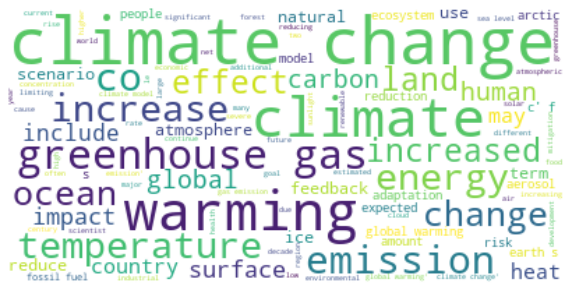

In [27]:
# Without removing stopwords
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42
                        ).generate(str(sentences))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Why did we do all this work

In [28]:
# reFetching the data
lame_text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    lame_text += paragraph.text

In [29]:
    ###Doing the same without removing stop words or lemming
lame_sentences = nltk.sent_tokenize(lame_text)
lame_tokenized = [nltk.word_tokenize(sentence) for sentence in lame_sentences]

<Figure size 432x288 with 0 Axes>

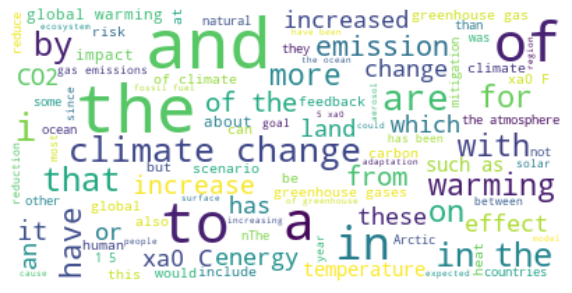

In [30]:
# REDO WORDCLOUD BUT WE SET STOPWORDS EMPTY
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42, ###SET STOPWORDS = [] and/or include_numbers = True or you will get the same thing!!!
                        stopwords = [],
                        include_numbers = True).generate(str(lame_sentences)) 
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [31]:
# Training the Word2Vec model, but wrong
model = Word2Vec(lame_tokenized, min_count=1)

words = model.wv.index_to_key
print(words[:10])

[',', 'the', '.', '[', ']', 'and', 'of', 'to', 'in', 'climate']


In [32]:
# Finding Word Vectors
vector = model.wv['global'] #get the vector of the word "global"
print(vector)

[-0.06615733  0.16297066  0.04617316  0.05895092 -0.01167801 -0.27544203
  0.11304256  0.34444794 -0.23399924 -0.11856354 -0.02040217 -0.32891405
 -0.07935868  0.12701948 -0.00422447 -0.03843356  0.10015265 -0.16944297
 -0.09133585 -0.48205492  0.18765818  0.01131805  0.21903132 -0.1153876
 -0.05359152  0.01960111 -0.18839513 -0.09016006 -0.16417661  0.06811927
  0.17598681 -0.02047381  0.16651458 -0.16532901 -0.0548363   0.1976381
  0.02562649 -0.07652189 -0.1009113  -0.27121472  0.07271653 -0.12966312
 -0.16892508  0.03648345  0.15830123 -0.08834793 -0.13573729 -0.12955336
  0.12271025  0.17734508  0.09883513 -0.12059968 -0.04693109 -0.06874199
 -0.07146224  0.07581442  0.1104501  -0.09005278 -0.17014031  0.09468382
  0.02814573 -0.03431823  0.00803692  0.00858232 -0.19518767  0.19053277
  0.05484286  0.10503564 -0.20851329  0.239541   -0.06865276  0.08467361
  0.2044704  -0.04009969  0.23043002  0.05665056  0.01800014  0.01336327
 -0.14398995 -0.04441555 -0.19931641 -0.01521152 -0.1

In [33]:
# Most similar words
similar1 = model.wv.most_similar('climate')

similar2 = model.wv.most_similar('carbon', topn=10) 

In [34]:
similar1, similar2

([(',', 0.9992424845695496),
  ('of', 0.9990382194519043),
  ('to', 0.9989823698997498),
  ('the', 0.9989482164382935),
  ('in', 0.9989230632781982),
  ('and', 0.9988805055618286),
  (']', 0.9987517595291138),
  ('a', 0.998730480670929),
  ('.', 0.9987261891365051),
  ('be', 0.9986940026283264)],
 [(',', 0.9991213083267212),
  ('to', 0.9990537762641907),
  ('of', 0.9989357590675354),
  ('the', 0.9989354014396667),
  ('a', 0.9988433718681335),
  ('in', 0.9987808465957642),
  (']', 0.998749315738678),
  ('have', 0.9987155199050903),
  ('.', 0.9987012147903442),
  ('and', 0.9986937642097473)])